###### OBS.: Para rodar os códigos, vá na pasta "tabelas" que está na pasta do drive em que este notebook colab se encontra, baixe as tabelas e jogue-os na área de arquivos na barra lateral esquerda deste notebook.

# Análise exploratória de dados (EDA)
Envolve explorar os dados até que você compreenda bem suas principais características, o que inclui detectar padrões, identificar anomalias, testar hipóteses e verificar pressupostos estatísticos.

##Problemática

Para que empresas e gestores públicos possam tomar decisões mais eficazes, é essencial entender como o perfil da população brasileira está mudando ao longo do tempo.

Aspectos como poder aquisitivo e nível de instrução são fundamentais para antecipar tendências de mercado, identificar regiões com maior potencial de consumo e planejar investimentos em setores estratégicos.

Pensando nisso, a nossa pesquisa busca responder a uma pergunta central: como a evolução da população, da força de trabalho, dos salários e da escolaridade pode impactar o cenário socioeconômico do Brasil nas próximas décadas?

## Bibliotecas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from ipywidgets import interact
import ipywidgets as widgets

# Salvar em csv
# csv_path = os.path.join(os.path.dirname(__file__),"csv_temp") # Serve somente para arquivos .py
# csv_path = os.path.join(os.getcwd(), "csv_temp")
# if not os.path.exists(csv_path):
#     os.makedirs(csv_path)

# Dataset 1 - Projeções

In [11]:
df_projecoes = pd.read_excel('./tables/projecoes_2024_tab4_indicadores.xlsx', skiprows=6)
df_projecoes

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M,TCG_T,TCG_H,TCG_M,...,RDI60,RDT60,RDJ65,RDI65,RDT65,IE60,IE65,IE80,ID_M,ID_MED
0,2000,0,BR,Brasil,174695935,85720706,88975229,NaN,NaN,NaN,...,14.206208,62.953355,46.698707,9.407064,56.105772,29.142644,20.144164,3.888745,28.314517,25.286941
1,2001,0,BR,Brasil,177003743,86821427,90182316,1.321043,1.284078,1.356655,...,14.307632,61.839348,45.530672,9.495381,55.026053,30.101231,20.854910,4.035052,28.572942,25.595223
2,2002,0,BR,Brasil,179228254,87882321,91345933,1.256759,1.221926,1.290294,...,14.419914,60.766364,44.393946,9.599581,53.993527,31.113308,21.623625,4.205821,28.845196,25.923454
3,2003,0,BR,Brasil,181377654,88907299,92470355,1.199253,1.166307,1.230949,...,14.550357,59.763442,43.304364,9.714486,53.018850,32.181739,22.433041,4.396686,29.128255,26.278205
4,2004,0,BR,Brasil,183469593,89905311,93564282,1.153361,1.122531,1.183003,...,14.711434,58.851646,42.264210,9.836084,52.100294,33.328869,23.272845,4.606715,29.420245,26.650273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,2066,53,DF,Distrito Federal,2833335,1349784,1483551,-0.768785,-0.712703,-0.819755,...,78.880664,101.272634,19.581355,56.427767,76.009122,352.272107,288.170893,110.644515,49.393802,52.236564
2339,2067,53,DF,Distrito Federal,2810837,1339890,1470947,-0.794047,-0.733006,-0.849583,...,80.019301,102.432573,19.588116,57.328164,76.916279,357.017496,292.668091,113.348328,49.557541,52.511818
2340,2068,53,DF,Distrito Federal,2787832,1329808,1458024,-0.818439,-0.752450,-0.878550,...,81.100627,103.550669,19.610389,58.193637,77.804026,361.249333,296.749015,115.608373,49.708977,52.782436
2341,2069,53,DF,Distrito Federal,2764372,1319558,1444814,-0.841514,-0.770788,-0.906021,...,82.166193,104.675965,19.651429,59.034309,78.685738,365.024554,300.407211,117.424240,49.848250,53.040354


In [13]:
df_projecoes_filtrado = df_projecoes[ (df_projecoes["LOCAL"].str.strip() == "Brasil") & ( df_projecoes["ANO"].astype(float).between(2018, 2045) ) ]
df_projecoes_filtrado

colunas_desejadas = ["ANO", "LOCAL", "POP_T", "POP_H", "POP_M", "e0_T", "e60_T"]
df_projecoes_filtrado = df_projecoes_filtrado[colunas_desejadas].rename(columns={
    "ANO": "year",
    "LOCAL": "local",
    "POP_T": "pop_t",
    "POP_H": "pop_h",
    "POP_M": "pop_m",
    "e0_T": "e0_t",
    "e60_T": "e60_t"
})

df_projecoes_filtrado

# Salvar CSV
# projecoes2_df_filtrado.to_csv(os.path.join(csv_path,"projecoes.csv"), index=False)

,year,local,pop_t,pop_h,pop_m,e0_t,e60_t
18,2018,Brasil,206529038,100895555,105633483,75.990227,22.206781
19,2019,Brasil,207900099,101551234,106348865,76.221101,22.254800
20,2020,Brasil,209164889,102140954,107023935,74.809005,21.169615
21,2021,Brasil,210103642,102550853,107552789,72.784302,20.084039
22,2022,Brasil,210862983,102875114,107987869,75.448044,21.619386
23,2023,Brasil,211695158,103251553,108443605,76.388455,22.470774
24,2024,Brasil,212583750,103662286,108921464,76.605711,22.590940
25,2025,Brasil,213421037,104046624,109374413,76.817749,22.707651
26,2026,Brasil,214211951,104407312,109804639,77.027247,22.822143
27,2027,Brasil,214959713,104746113,110213600,77.234142,22.935011


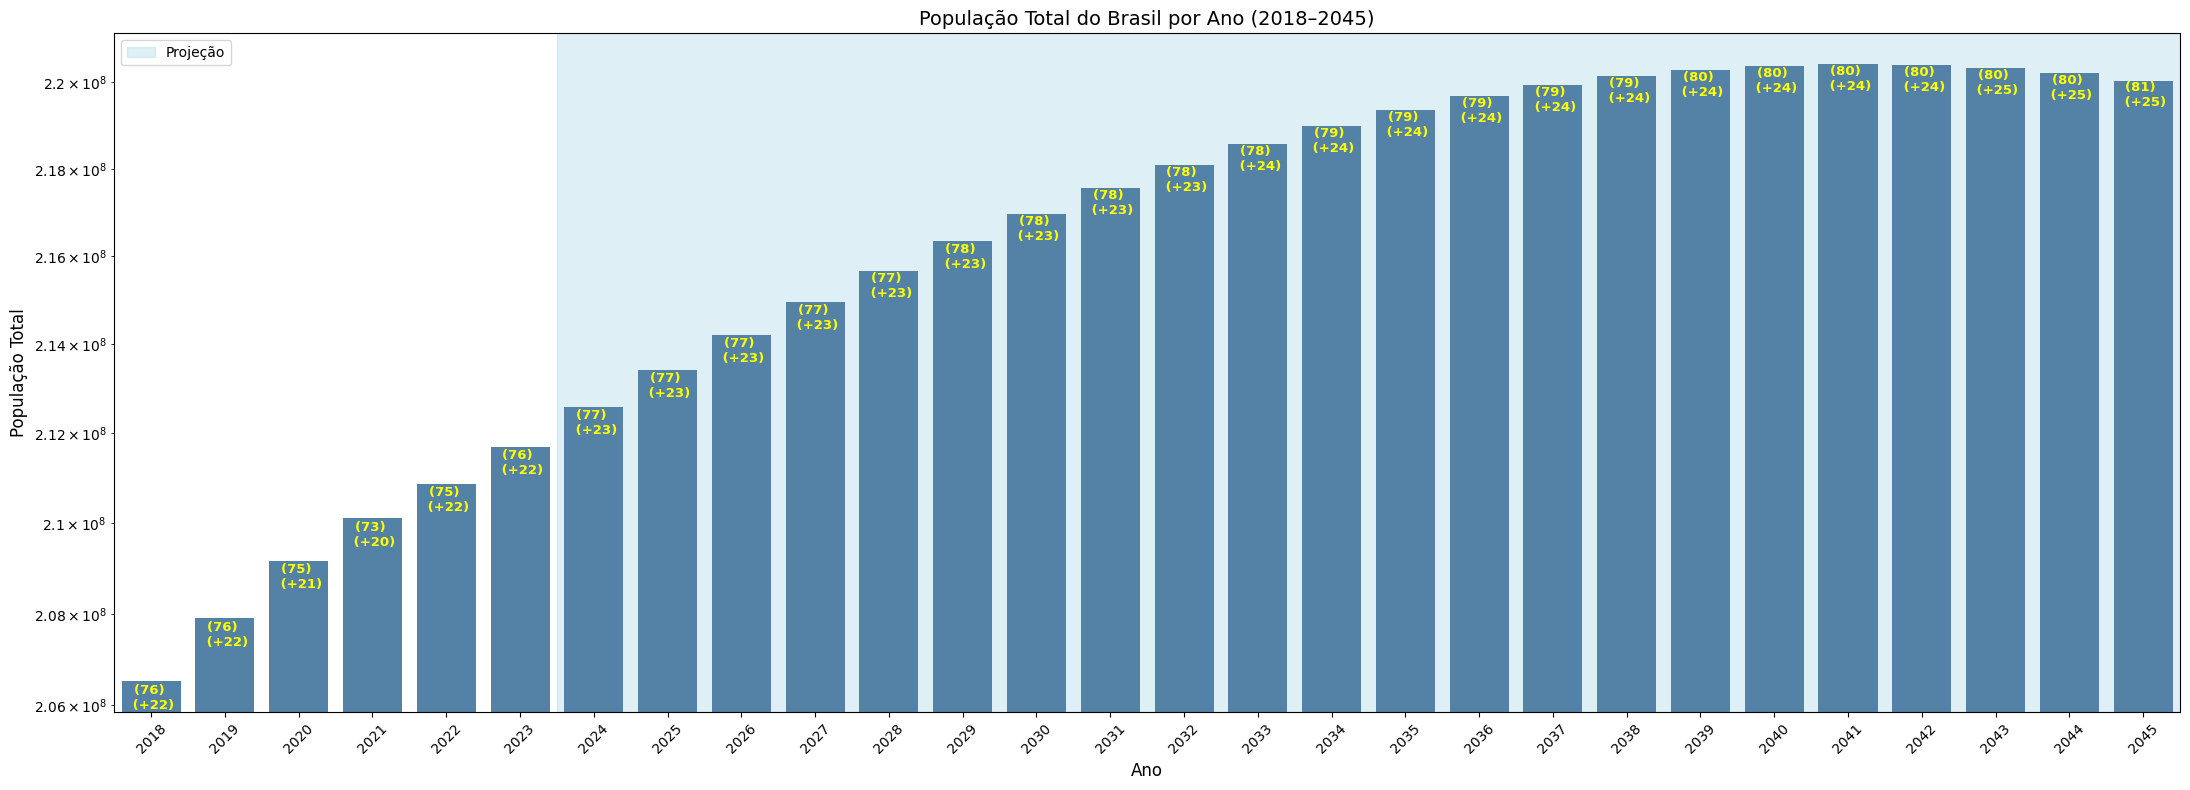

In [14]:
# Criar o gráfico de barras
plt.figure(figsize=(22, 8))

anos = df_projecoes_filtrado["year"].tolist()
inicio = anos.index(2024)
fim = anos.index(2045)
plt.axvspan(inicio - 0.5, fim + 0.5, color="lightblue", alpha=0.4, label="Projeção")

ax = sns.barplot(data=df_projecoes_filtrado, x="year", y="pop_t", color="steelblue")

# Adicionar texto em cada barra
for index, row in df_projecoes_filtrado.iterrows():
    ano = row["year"]
    pop_total = row["pop_t"]
    e0_t = row["e0_t"]
    e60_t = row["e60_t"]

    plt.text(
        x = index - 18,
        y = pop_total - 6e5,
        s=f"({e0_t:,.0f}) \n (+{e60_t:,.0f})",
        ha = "center",
        fontsize = 9.5,
        color = "yellow",
        fontweight = "bold",
        label="(e0_t) | (+e60_t)"
    )

# Personalização
plt.title("População Total do Brasil por Ano (2018–2045)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("População Total", fontsize=12)
plt.yscale("log")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Com legenda:

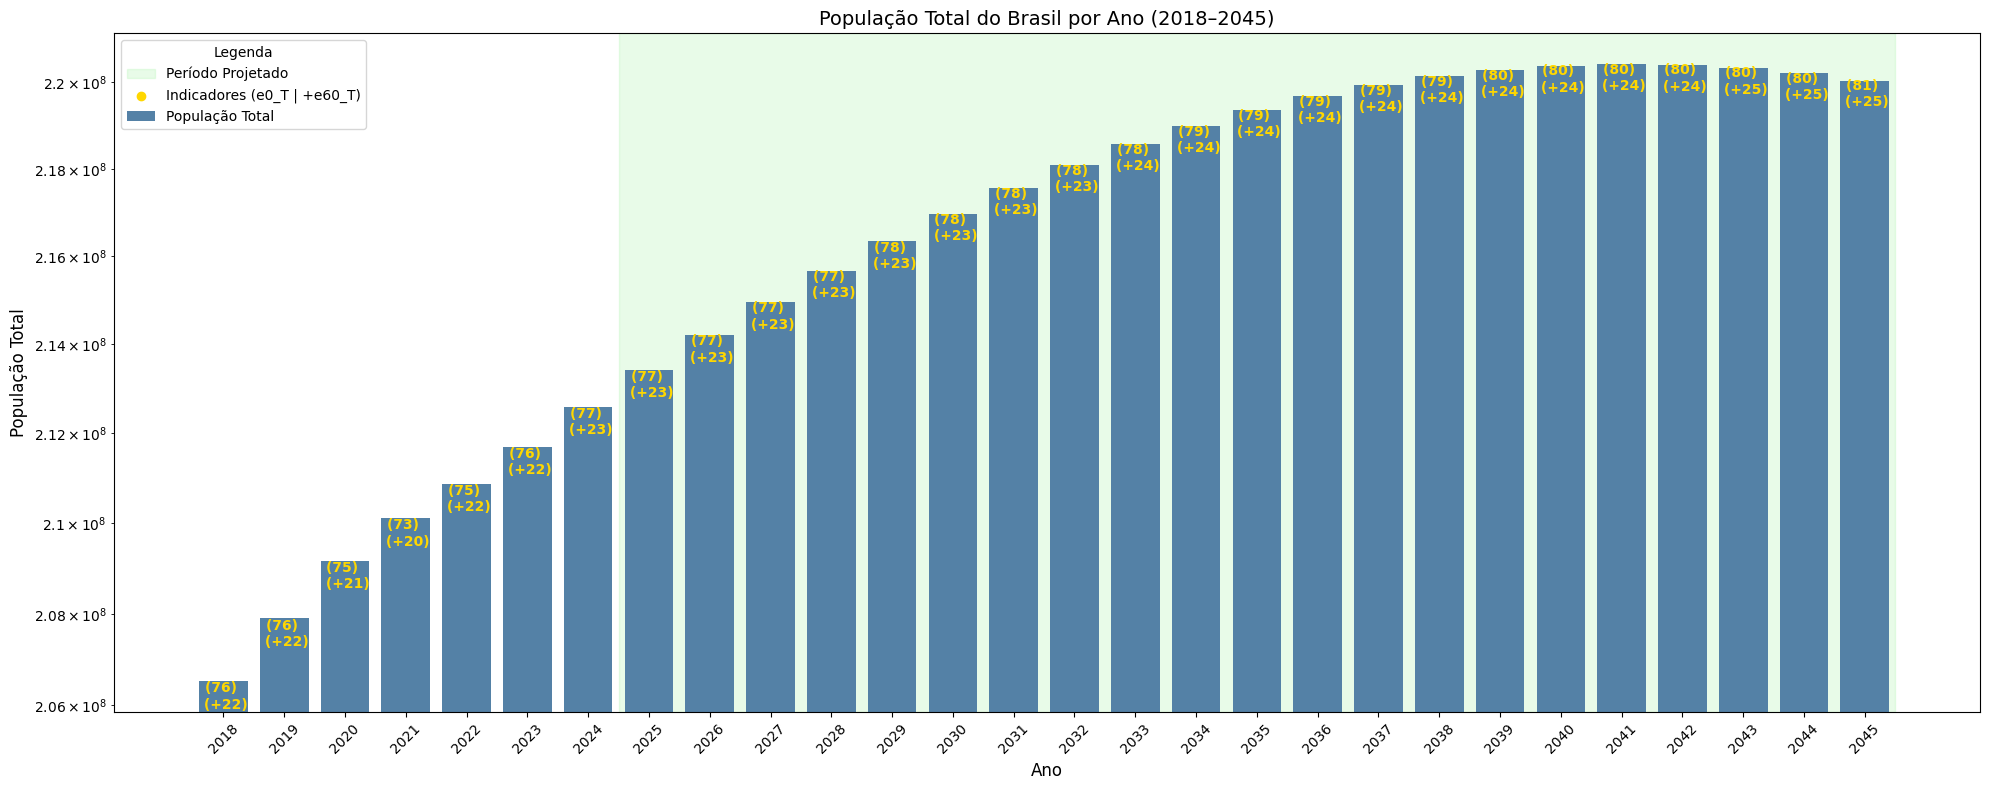

In [ ]:
plt.figure(figsize=(20, 8))

# Região de projeção (atrás das barras)
anos = df_projecoes_filtrado["year"].tolist()
inicio = anos.index(2025)
fim = anos.index(2045)
plt.axvspan(inicio - 0.5, fim + 0.5, color="lightgreen", alpha=0.2, label="Período Projetado")

# Barras
ax = sns.barplot(data=df_projecoes_filtrado, x="year", y="pop_t", color="steelblue", label="População Total")

# Textos em cada barra
for i, row in df_projecoes_filtrado.iterrows():
      plt.text(i - 18, row["pop_t"] - 6e5,
             f"({row['e0_t']:,.0f}) \n (+{row['e60_t']:,.0f})",
             ha="center", fontsize=10, color="gold", fontweight="bold")

# Marcadores invisíveis para legenda
plt.scatter([], [], color="gold", label="Indicadores (e0_T | +e60_T)")
# plt.scatter([], [], color="darkred", label="Texto (cor anterior, se necessário)")

# Legenda e rótulos
plt.title("População Total do Brasil por Ano (2018–2045)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("População Total", fontsize=12)
plt.yscale("log")
plt.xticks(rotation=45)
plt.legend(title="Legenda", loc="upper left")
plt.tight_layout()
plt.show()



O gráfico acima descreve a estimativa do crescimento da população brasileira ao longo dos anos.

- O primeiro número é a expectativa de vida ao nascer.

- O segundo número é a expectativa de vida a mais, de pessoas com +60 anos naquele ano.

É possível notar que a população total cresce de forma constante entre 2018 e aproximadamente 2040, atingindo seu pico nesse período, seguido por uma tendência de estabilização.

Também é possível perceber que devido ao período da pandemia causada pelo covid-19 houve uma queda da estimativa de vida nos anos de 2020 e 2021.

É interessante considerar, por exemplo, uma pessoa que está com 40 anos em 2025: ela vai ter uma expectativa de vida de +23 anos (63), e em 20 anos, ou seja, em 2045, ela terá uma expectativa de +25.

Esse gráfico nos mostra um pouco que a população está tendo mais anos de vida ao longo do tempo, por diversos motivos, como o avanço da tecnologia e da medicina, que estão contribuindo para prolongar a vida das pessoas.



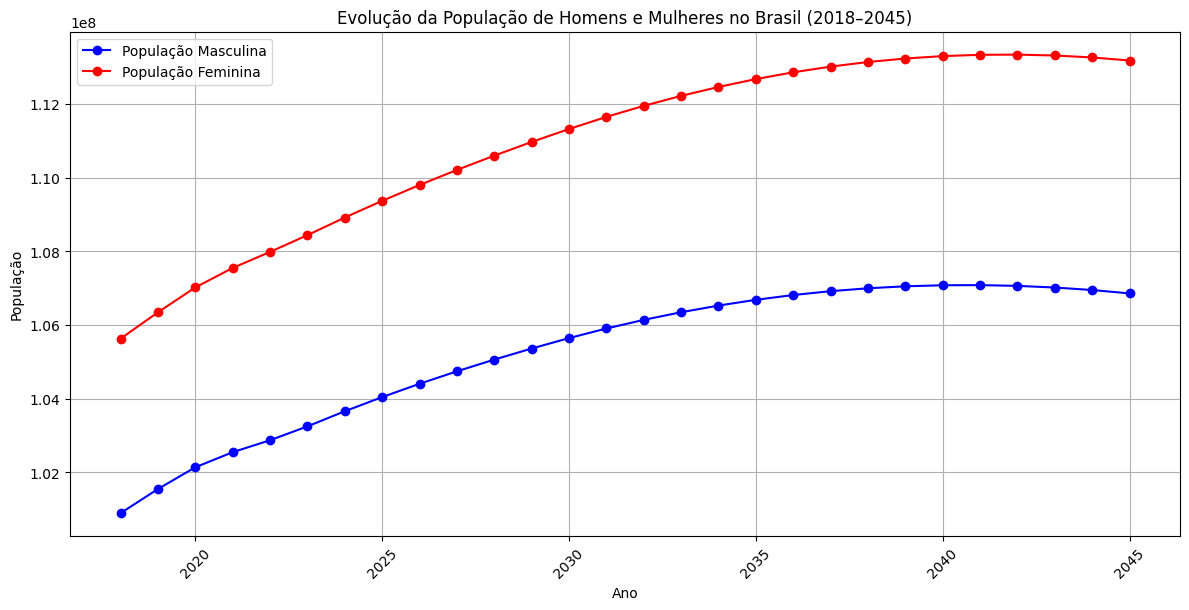

In [ ]:
import matplotlib.pyplot as plt

# Plotando a evolução da população total, masculina e feminina
plt.figure(figsize=(12, 6))
# plt.plot(df_projecoes_filtrado["year"], df_projecoes_filtrado["pop_t"], label="População Total", color="green", marker='o')
plt.plot(df_projecoes_filtrado["year"], df_projecoes_filtrado["pop_h"], label="População Masculina", color="blue", marker='o')
plt.plot(df_projecoes_filtrado["year"], df_projecoes_filtrado["pop_m"], label="População Feminina", color="red", marker='o')

plt.title("Evolução da População de Homens e Mulheres no Brasil (2018–2045)")
plt.xlabel("Ano")
plt.ylabel("População")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


O gráfico acima descreve a quantidade de homens e mulheres projetada por faixa etária e ano.

Nota-se que, desde 2018, a população feminina é superior à masculina, e essa diferença se mantém constante até 2045. Ambas as curvas apresentam crescimento contínuo até cerca de 2040, quando ocorre uma leve estabilização ou queda.

In [ ]:
# Cálculo do crescimento percentual ano a ano
df_crescimento = df_projecoes_filtrado.copy()

df_crescimento["crescimento_pop_t"] = df_crescimento["pop_t"].pct_change() * 100
df_crescimento["crescimento_pop_h"] = df_crescimento["pop_h"].pct_change() * 100
df_crescimento["crescimento_pop_m"] = df_crescimento["pop_m"].pct_change() * 100

# Visualizar as primeiras linhas com crescimento calculado
df_crescimento[["year", "crescimento_pop_t", "crescimento_pop_h", "crescimento_pop_m"]]


,year,crescimento_pop_t,crescimento_pop_h,crescimento_pop_m
18,2018,NaN,NaN,NaN
19,2019,0.663859,0.649859,0.677230
20,2020,0.608364,0.580712,0.634769
21,2021,0.448810,0.401307,0.494146
22,2022,0.361413,0.316195,0.404527
23,2023,0.394652,0.365918,0.422025
24,2024,0.419751,0.397798,0.440652
25,2025,0.393862,0.370760,0.415849
26,2026,0.370589,0.346660,0.393352
27,2027,0.349076,0.324499,0.372444


# Dataset 2 - Força de trabalho

Obtendo o dataset

In [ ]:
df_trabalho = pd.read_excel('/content/tabela_1_1_Indic_BR.xls', skiprows=2)
df_trabalho = df_trabalho.drop(df_trabalho.index[0:5]).reset_index(drop=True)
df_trabalho = df_trabalho.drop(df_trabalho.index[75:])
df_trabalho

,Características selecionadas,População em idade de trabalhar\n(1 000 pessoas),População na força de trabalho\n(1 000 pessoas),População ocupada\n(1 000 pessoas),População ocupada em trabalhos formais (1)\n(1 000 pessoas),População desocupada\n(1 000 pessoas),População na força de trabalho potencial\n(1 000 pessoas),População subutilizada\n(1 000 pessoas),Taxa de participação (%),Nível de ocupação (%),Taxa de formalização (%),Taxa de desocupação (%),Taxa composta de subutilização (%)
0,Total,174809.487006,109156.403664,100690.272837,59675.039181,8466.130828,7022.975150,20889.057689,62.443066,57.600005,59.265942,7.755964,17.980005
1,14 a 29 anos,51434.829002,31444.651881,27188.847740,15091.171940,4255.804141,3174.629680,9154.401383,61.134940,52.860772,55.505007,13.534270,26.443072
2,14 a 17 anos,12016.023406,2131.923110,1483.541461,309.324831,648.381649,939.627938,1767.917633,17.742335,12.346360,20.850434,30.412994,57.557814
3,18 a 24 anos,22290.788596,15441.239173,13077.164143,7072.664327,2364.075030,1502.582821,4727.829981,69.271839,58.666225,54.084083,15.310138,27.902972
4,25 a 29 anos,17128.017001,13871.489597,12628.142135,7709.182782,1243.347462,732.418921,2658.653769,80.987131,73.727987,61.047640,8.963331,18.205084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Total,97919.445314,60742.067244,55239.261426,29931.234062,5502.805818,4868.849937,13974.518601,62.032691,56.412964,54.184711,9.059300,21.299075
71,Sem instrução ou fundamental incompleto,33559.350535,14681.159968,13414.154964,4613.691167,1267.005004,1881.796542,4368.860420,43.746854,39.971438,34.394199,8.630142,26.377298
72,Ensino fundamental completo ou médio incompleto,17933.973387,9996.250783,8783.302750,3891.455194,1212.948033,1198.768832,3101.927923,55.739186,48.975777,44.305147,12.134030,27.708106
73,Ensino médio completo ou superior incompleto,35830.309342,27010.065350,24403.773039,15011.873602,2606.292311,1613.890328,5552.712428,75.383288,68.109300,61.514560,9.649337,19.398830


In [ ]:
df_trabalho.isnull().sum()

,0
Características selecionadas,1
População em idade de trabalhar\n(1 000 pessoas),10
População na força de trabalho\n(1 000 pessoas),10
População ocupada\n(1 000 pessoas),10
População ocupada em trabalhos formais (1)\n(1 000 pessoas),10
População desocupada\n(1 000 pessoas),10
População na força de trabalho potencial\n(1 000 pessoas),10
População subutilizada\n(1 000 pessoas),10
Taxa de participação (%),10
Nível de ocupação (%),10


## Gráfico 2

In [ ]:
# Definição das colunas e faixas etárias
colunas_desejadas_etario = {
    "Características selecionadas": "features",
    "População na força de trabalho\n(1 000 pessoas)": "work_pop"
}
faixas_etario = {
    "homens": (15, 22),  # Homens: linhas 18 a 25
    "mulheres": (24, 31) # Mulheres: linhas 27 a 34
}

# Lista com os anos disponíveis
anos = ["2018", "2019", "2020", "2021", "2022", "2023"]

# Função para carregar os dados, o arquivo possui mais de uma tabela para os diferentes anos
def carregar_etario(ano):

    df = pd.read_excel(
        "./tabela_1_1_Indic_BR.xls",
        sheet_name=ano,
        skiprows=2,
        usecols=list(colunas_desejadas_etario.keys())
    ).rename(columns=colunas_desejadas_etario)

    df['year'] = ano
    return df

# Função para processar os subconjuntos (homens e mulheres)
def processar_subconjuntos_etario(df):
    return {
        faixa: df.iloc[inicio:fim].assign(sex=sexo)
        for faixa, (inicio, fim), sexo in zip(faixas_etario.keys(), faixas_etario.values(), ['H', 'M'])
    }

In [ ]:
# Lista com os anos disponíveis
anos = ["2018", "2019", "2020", "2021", "2022", "2023"]

# Carregar os dados e processar os subconjuntos (homens/mulheres) para todos os anos
etario_filtrado = pd.concat(
    [
        pd.concat(processar_subconjuntos_etario(carregar_etario(ano)).values(), axis=0, ignore_index=True)
        for ano in anos
    ],
    axis=0, ignore_index=True
)

# Ajustes finais no DataFrame
etario_filtrado = etario_filtrado[["year", "sex", "features", "work_pop"]]
etario_filtrado["work_pop"] *= 1000

# Remover as linhas indesejadas
etario_filtrado = etario_filtrado[~etario_filtrado["features"].isin(["14 a 17 anos", "18 a 24 anos", "25 a 29 anos"])]

# Resetar os índices
etario_filtrado = etario_filtrado.reset_index(drop=True)

etario_filtrado
# etario_filtrado.to_csv(os.path.join(csv_path, "faixa_etario.csv"), index=False)

,year,sex,features,work_pop
0,2018,H,14 a 29 anos,1.857992e+07
1,2018,H,30 a 49 anos,2.774320e+07
2,2018,H,50 a 59 anos,8.655983e+06
3,2018,H,60 anos ou mais,4.308652e+06
4,2018,M,14 a 29 anos,1.455251e+07
5,2018,M,30 a 49 anos,2.292031e+07
6,2018,M,50 a 59 anos,6.513811e+06
7,2018,M,60 anos ou mais,2.347598e+06
8,2019,H,14 a 29 anos,1.868700e+07
9,2019,H,30 a 49 anos,2.806768e+07


## Gráfico 3

In [ ]:
# Definição das colunas e faixas etárias
colunas_desejadas_instrucao = {
    "Características selecionadas": "degree",
    "População na força de trabalho\n(1 000 pessoas)": "work_pop"
}

faixas_instrucao = {
    "homens": (58, 62),  # Homens: linhas 58 a 62
    "mulheres": (64, 68) # Mulheres: linhas 64 a 68
}

# Lista com os anos disponíveis
anos = ["2018", "2019", "2020", "2021", "2022", "2023"]

# Função para carregar os dados de instrução
def carregar_instrucao(ano):

    df = pd.read_excel(
        "./tabela_1_1_Indic_BR.xls",
        sheet_name=ano,
        skiprows=2,
        usecols=list(colunas_desejadas_instrucao.keys())
    ).rename(columns=colunas_desejadas_instrucao)

    df['year'] = ano
    return df

# Função para processar os subconjuntos (homens e mulheres)
def processar_subconjuntos_instrucao(df):
    return {
        faixa: df.iloc[inicio:fim].assign(sex=sexo)
        for faixa, (inicio, fim), sexo in zip(faixas_instrucao.keys(), faixas_instrucao.values(), ['H', 'M'])
    }

In [ ]:
# Carregar os dados e processar os subconjuntos (homens/mulheres) para todos os anos
socio_filtrado = pd.concat(
    [
        pd.concat(processar_subconjuntos_instrucao(carregar_instrucao(ano)).values(), axis=0, ignore_index=True)
        for ano in anos
    ],
    axis=0, ignore_index=True
)

# Ajustes finais no DataFrame
socio_filtrado = socio_filtrado[["year", "sex", "degree", "work_pop"]]
socio_filtrado["work_pop"] *= 1000
socio_filtrado
# socio_filtrado.to_csv(os.path.join(csv_path, "faixa_socio.csv"), index=False)

,year,sex,degree,work_pop
0,2018,H,Sem instrução ou fundamental incompleto,1.779664e+07
1,2018,H,Ensino fundamental completo ou médio incompleto,1.032244e+07
2,2018,H,Ensino médio completo ou superior incompleto,2.256167e+07
3,2018,H,Ensino superior completo,8.607003e+06
4,2018,M,Sem instrução ou fundamental incompleto,8.985535e+06
5,2018,M,Ensino fundamental completo ou médio incompleto,6.731356e+06
6,2018,M,Ensino médio completo ou superior incompleto,1.979529e+07
7,2018,M,Ensino superior completo,1.082206e+07
8,2019,H,Sem instrução ou fundamental incompleto,1.725747e+07
9,2019,H,Ensino fundamental completo ou médio incompleto,1.045919e+07


## Gráficos 2 e 3

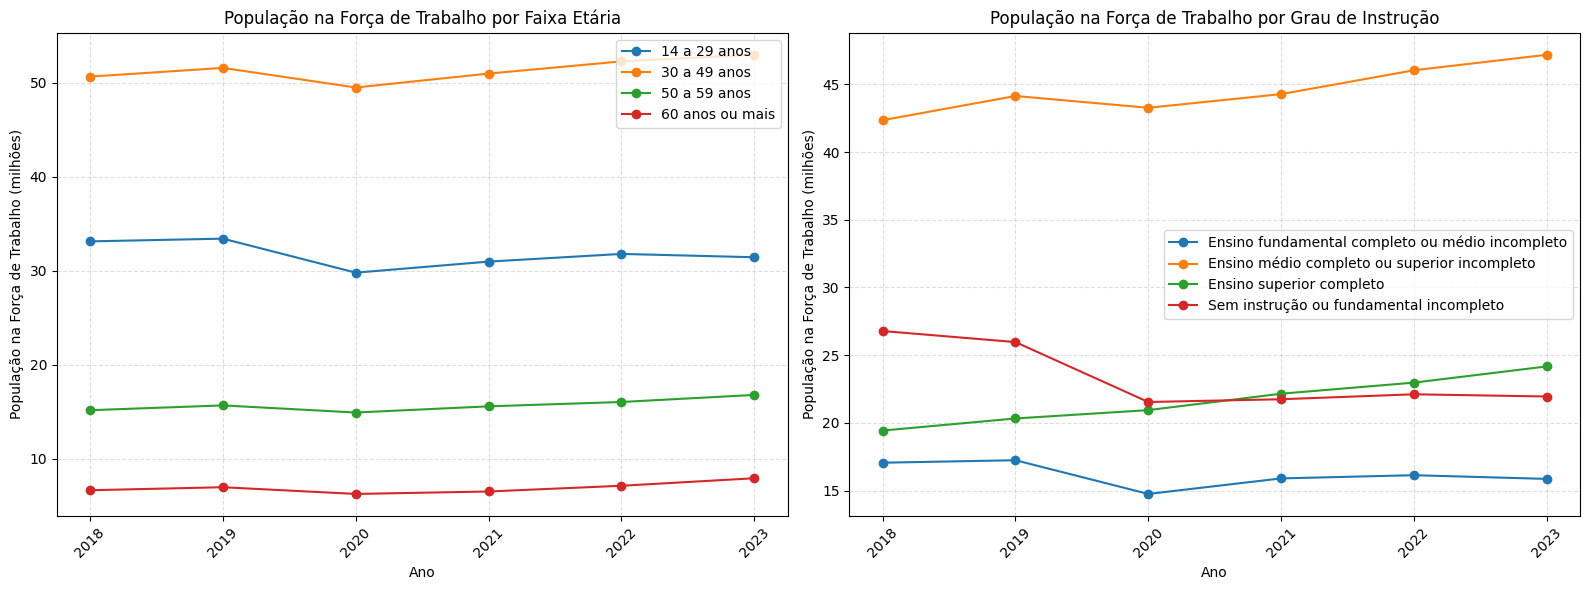

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico com 1 linha e 2 colunas
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: População por faixa etária ao longo dos anos
# Agrupar por ano e faixa etária somando homens e mulheres
etario_agrupado = etario_filtrado.groupby(["year", "features"])["work_pop"].sum().reset_index()

# Definindo as faixas etárias (certifique-se de que existam no DataFrame)
faixas_etarias = etario_agrupado["features"].unique()

# Iterar e plotar cada faixa etária
for faixa in faixas_etarias:
    faixa_data = etario_agrupado[etario_agrupado["features"] == faixa]
    axs[0].plot(faixa_data["year"], faixa_data["work_pop"] / 1e6, marker="o", linestyle="-", label=faixa)

# Adicionar rótulos e título para o gráfico 1
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("População na Força de Trabalho (milhões)")
axs[0].set_title("População na Força de Trabalho por Faixa Etária")
axs[0].tick_params(axis="x", rotation=45)
axs[0].grid(True, linestyle="--", alpha=0.4)
axs[0].legend(loc="best")

# Gráfico 2: População por grau de instrução ao longo dos anos
# Agrupar os dados por ano e grau de instrução, somando a população de homens e mulheres
socio_agrupado = socio_filtrado.groupby(['year', 'degree'])['work_pop'].sum().reset_index()

# Plotar cada grau de instrução
for grau in socio_agrupado["degree"].unique():
    grau_data = socio_agrupado[socio_agrupado["degree"] == grau]
    axs[1].plot(grau_data["year"], grau_data["work_pop"] / 1e6, marker="o", linestyle="-", label=grau)

# Adicionar rótulos e título para o gráfico 2
axs[1].set_xlabel("Ano")
axs[1].set_ylabel("População na Força de Trabalho (milhões)")
axs[1].set_title("População na Força de Trabalho por Grau de Instrução")
axs[1].tick_params(axis="x", rotation=45)
axs[1].grid(True, linestyle="--", alpha=0.4)
axs[1].legend(loc="best")

# Ajustar o layout
plt.tight_layout()
plt.show()


Os dois gráficos acima descrevem respectivamente o número estimado de pessoas economicamente ativas em diferentes faixas etárias e a quantidade de trabalhadores projetada de acordo com o nível de escolaridade.

Observa-se que no gráfico da esquerda, o grupo de 30 a 49 anos se mantém como o maior contingente na força de trabalho, apresentando leve oscilação ao longo do período, mas com uma tendência geral de crescimento.

Já no gráfico da direita, um dos destaques é o crescimento contínuo da participação das pessoas com ensino superior completo, que passa de cerca de 19 milhões em 2018 para quase 24 milhões em 2023. Ao mesmo tempo, há uma expressiva queda na quantidade de trabalhadores sem instrução ou com fundamental incompleto.

É interessante observar no gráfico à direita, que a quantidade de pessoas sem grau de instrução diminui, ao passo que as pessoas com ensino superior completo aumenta. Isso significa que as pessoas estão tendo mais acesso e estão em busca de mais educação.

# Dataset 3 e 4 - Renda

In [ ]:
df_renda_etario = pd.read_excel('/content/tabela_1_15_OcupCaract_Geo_Rend.xls', skiprows=4)
df_renda_etario = df_renda_etario.drop(df_renda_etario.index[0]).reset_index(drop=True)
df_renda_etario = df_renda_etario.drop(df_renda_etario.index[60:])
df_renda_etario

,Unnamed: 0,Unnamed: 1,Homens,Mulheres,Branca,Preta,Parda,Preta ou parda,Homem branco,Homem preto ou pardo,Mulher branca,Mulher preta ou parda,14 a 29 anos,30 a 49 anos,50 a 59 anos,60 anos ou mais
0,Brasil,2889.949858,3172.832582,2510.014069,3728.495112,2167.827098,2206.805173,2198.496153,4167.147452,2402.676598,3185.968649,1904.907107,1963.744948,3196.241584,3222.886771,3449.019990
1,Norte,2335.910891,2454.504287,2149.678829,3264.961408,2042.239758,2109.705502,2100.226295,3487.989454,2213.951875,2966.521899,1914.058505,1661.939424,2532.638841,2759.865400,2852.820549
2,Rondônia,2635.980223,2851.547928,2281.542197,3263.122376,2248.304954,2430.214989,2405.957644,3607.292687,2598.760846,2794.519650,2065.337808,2084.975555,2643.757818,3177.744966,3363.555226
3,Porto Velho,2702.763235,2792.541806,2569.391045,3277.206947,2345.700982,2627.180497,2593.779065,3445.983865,2691.574154,3114.642121,2435.617559,2104.321049,2815.699575,2930.083195,3281.419039
4,Acre,2338.021353,2375.994968,2285.248972,3204.865226,1870.081248,2161.007208,2128.555431,3384.663034,2151.457347,2993.305643,2095.382165,1513.131452,2529.651078,2843.748990,3140.457952
5,Rio Branco,2662.340799,2819.145761,2473.597809,3763.076939,2033.889356,2426.605245,2380.576353,4038.975246,2535.502214,3484.123323,2185.401358,1751.178313,2791.979943,3222.082330,4093.662898
6,Amazonas,2307.654656,2457.569191,2056.907973,3513.973484,1983.743279,2077.965198,2070.912521,3931.355473,2209.094858,2988.306342,1825.784241,1703.844234,2514.801750,2623.654528,2702.838495
7,Manaus,2786.609388,3070.265240,2357.006522,3870.105946,2423.035503,2497.736394,2492.372459,4269.568028,2773.312061,3381.531004,2035.681469,1943.830555,3047.301497,3280.666825,3644.331377
8,Roraima,2701.105435,2844.395243,2478.445359,3591.786028,2264.824045,2481.319936,2454.081277,4046.814883,2533.085140,2944.883771,2326.825859,1854.727041,2955.054301,3160.497988,3712.258986
9,Boa Vista,2916.977163,3149.277260,2584.494042,3883.372520,2516.640225,2652.711085,2635.660570,4472.170502,2784.481383,3126.028766,2412.434369,1950.375531,3171.061030,3540.889931,4321.777459


In [ ]:
df_renda_etario.isnull().sum()

,0
Unnamed: 0,0
Unnamed: 1,0
Homens,0
Mulheres,0
Branca,0
Preta,0
Parda,0
Preta ou parda,0
Homem branco,0
Homem preto ou pardo,0


## Gráfico 5

In [ ]:
df_renda_instrucao = pd.read_excel('/content/tabela_1_17_InstrCaract_Rend.xls', skiprows=5)
df_renda_instrucao = df_renda_instrucao.drop(df_renda_instrucao.index[0:2]).reset_index(drop=True)
df_renda_instrucao = df_renda_instrucao.drop(df_renda_instrucao.index[48:])
df_renda_instrucao

,Unnamed: 0,Unnamed: 1,Sem instrução ou fundamental incompleto,Ensino fundamental completo ou médio incompleto,Ensino médio completo ou superior incompleto,Ensino superior completo
0,Brasil,17.861500,10.165536,11.170672,13.884618,35.712589
1,Norte,14.868623,9.233523,9.606631,12.449415,30.375522
2,Nordeste,12.608603,6.941731,8.210592,10.318506,29.957208
3,Sudeste,20.113055,11.413406,11.740679,14.972470,38.435584
4,Sul,19.112810,12.450779,13.277190,15.632394,34.790659
5,Centro-Oeste,19.881323,12.864164,12.699192,15.182874,36.521711
6,Homens,NaN,NaN,NaN,NaN,NaN
7,Brasil,18.743766,10.474627,11.931299,15.413005,42.510619
8,Norte,15.041685,9.671491,10.043160,13.644702,34.745978
9,Nordeste,12.628000,7.163778,8.668527,11.240500,36.294653


## Gráfico 4 e 5

In [ ]:
def carregar_socio():
    colunas_desejadas_BR = {"Grandes Regiões, sexo e cor ou raça": "BR"}

    colunas_desejadas_INST = {
        "Sem instrução ou fundamental incompleto": "incomplete",
        "Ensino fundamental completo ou médio incompleto": "elementary",
        "Ensino médio completo ou superior incompleto": "high",
        "Ensino superior completo": "college"
    }

    colunas_desejadas_IDADE_BR = {"Grandes Regiões, Unidades da Federação e Municípios das Capitais": "BR"}
    colunas_desejadas_IDADE = ["14 a 29 anos", "30 a 49 anos", "50 a 59 anos", "60 anos ou mais"]

    anos = ["2018", "2019", "2020", "2021", "2022", "2023"]

    # Criando o DataFrame inst_sal
    inst_sal = pd.concat(
        [
            pd.read_excel(
                "./tabela_1_17_InstrCaract_Rend.xls",
                sheet_name=ano,
                skiprows=3,
                usecols=colunas_desejadas_BR
            ).rename(columns=colunas_desejadas_BR)
            .iloc[[4]]
            .reset_index(drop=True)
            .assign(year=ano)

            .join(
                pd.read_excel(
                    "./tabela_1_17_InstrCaract_Rend.xls",
                    sheet_name=ano,
                    skiprows=5,
                ).drop(columns=["Unnamed: 0", "Unnamed: 1"])
                .drop([0,1])
                .iloc[[0]]
                .reset_index(drop=True)
                .rename(columns=colunas_desejadas_INST)
            )

            for ano in anos
        ], axis=0
    ).reset_index(drop=True)

    # Criando o DataFrame idade_sal
    idade_sal = pd.concat(
        [
            pd.read_excel(
                "./tabela_1_15_OcupCaract_Geo_Rend.xls",
                sheet_name=ano,
                skiprows=2,
                usecols=list(colunas_desejadas_IDADE_BR.keys())
            ).rename(columns=colunas_desejadas_IDADE_BR)
            .iloc[[3]]
            .reset_index(drop=True)
            .assign(year=ano)

            .join(
                pd.read_excel(
                    "./tabela_1_15_OcupCaract_Geo_Rend.xls",
                    sheet_name=ano,
                    skiprows=4,
                    usecols=colunas_desejadas_IDADE
                ).iloc[[1]]
                .reset_index(drop=True)
            )

            for ano in anos
        ], axis=0
    ).reset_index(drop=True)

    # Criando o DataFrame idade_inst_sal (junção de inst_sal e idade_sal)
    idade_inst_sal = pd.merge(inst_sal, idade_sal, on=["BR", "year"], how="inner")

    return idade_inst_sal

In [ ]:
idade_inst_sal = carregar_socio()

idade_inst_sal

,BR,year,incomplete,elementary,high,college,14 a 29 anos,30 a 49 anos,50 a 59 anos,60 anos ou mais
0,Brasil,2018,9.745825,10.972068,14.216615,38.466023,1837.441804,3131.369633,3374.710192,3553.824132
1,Brasil,2019,9.580408,10.985754,13.978273,38.362125,1799.406004,3145.671866,3340.318280,3408.933919
2,Brasil,2020,9.605309,11.115280,13.588044,37.219279,1858.484200,3236.145131,3362.657484,3702.929322
3,Brasil,2021,9.082320,10.125229,12.924026,35.478199,1781.978811,3016.821288,3166.742849,3538.659465
4,Brasil,2022,9.635943,10.629128,12.954739,33.268452,1821.693147,2988.594337,3051.332473,3191.277668
5,Brasil,2023,10.165536,11.170672,13.884618,35.712589,1963.744948,3196.241584,3222.886771,3449.019990


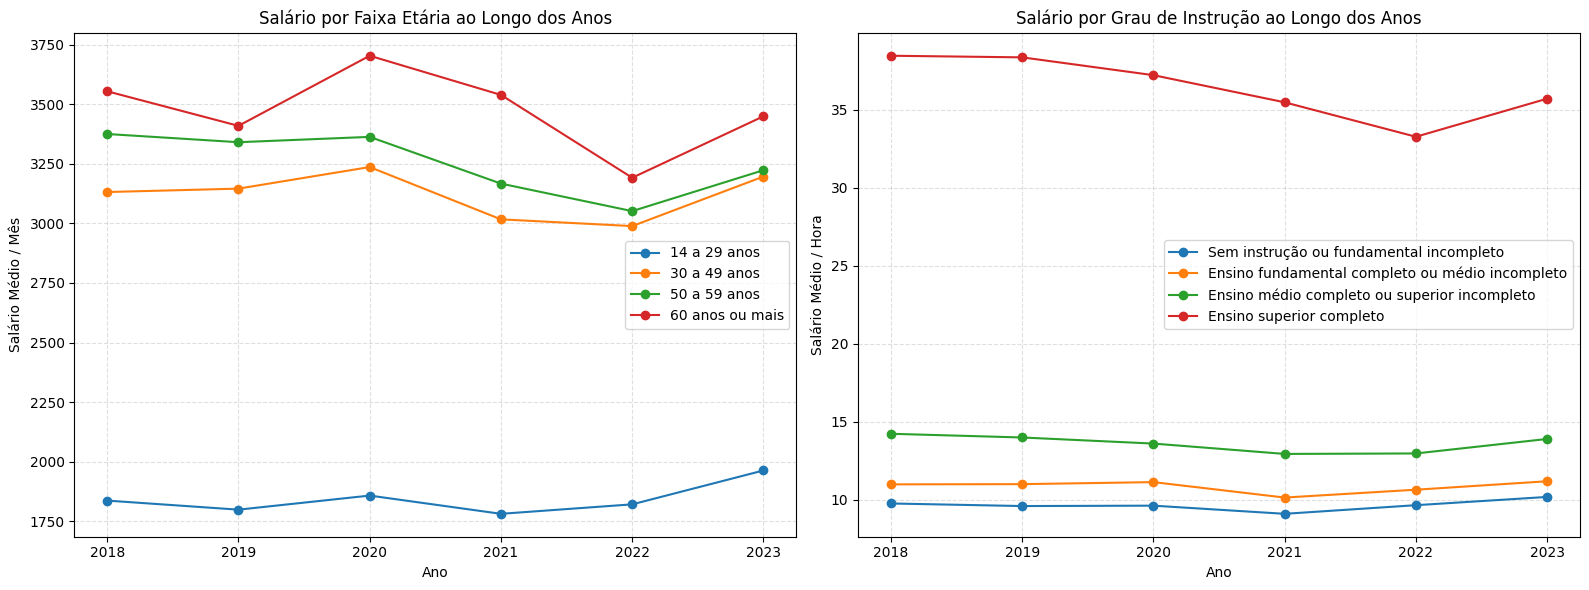

In [ ]:
# Criar a figura com 2 gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Salário por Faixa Etária ao Longo dos Anos
faixas_etarias = [
    "14 a 29 anos",
    "30 a 49 anos",
    "50 a 59 anos",
    "60 anos ou mais"
]

for faixa in faixas_etarias:
    axs[0].plot(idade_inst_sal["year"], idade_inst_sal[faixa], marker="o", linestyle="-", label=faixa)

axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Salário Médio / Mês")
axs[0].set_title("Salário por Faixa Etária ao Longo dos Anos")
axs[0].grid(True, linestyle="--", alpha=0.4)
axs[0].legend(loc="best")

# Gráfico 2: Salário por Grau de Instrução ao Longo dos Anos
graus_instrucao = {
    "Sem instrução ou fundamental incompleto": "incomplete",
    "Ensino fundamental completo ou médio incompleto": "elementary",
    "Ensino médio completo ou superior incompleto": "high",
    "Ensino superior completo": "college"
}

for legenda, coluna in graus_instrucao.items():
    axs[1].plot(idade_inst_sal["year"], idade_inst_sal[coluna], marker="o", linestyle="-", label=legenda)

axs[1].set_xlabel("Ano")
axs[1].set_ylabel("Salário Médio / Hora")
axs[1].set_title("Salário por Grau de Instrução ao Longo dos Anos")
axs[1].grid(True, linestyle="--", alpha=0.4)
axs[1].legend(loc="best")

plt.tight_layout()
plt.show()


Os dois gráficos acima descrevem respectivamente a média salarial estimada segundo a faixa etária da população e os salários médios projetados com base no nível educacional.

No gráfico da esquerda, observa-se que o salário médio mensal aumenta de forma geral com a idade. Indivíduos de 60 anos ou mais apresentam os maiores salários em todos os anos, com destaque para 2020, quando atingiram o pico de remuneração.

Já o gráfico da direita mostra que o salário médio por hora aumenta substancialmente com o nível de instrução. Indivíduos com ensino superior completo ganham, em média, mais que o dobro por hora do que aqueles sem instrução formal ou com fundamental incompleto. Esse grupo mais qualificado se mantém como o de maior rendimento ao longo de todo o período, mesmo durante as quedas de 2021 e 2022.